Model Performance on Test Data:
Accuracy: 96.49%
Precision: 97.50%
Recall: 92.86%
F1-Score: 95.12%


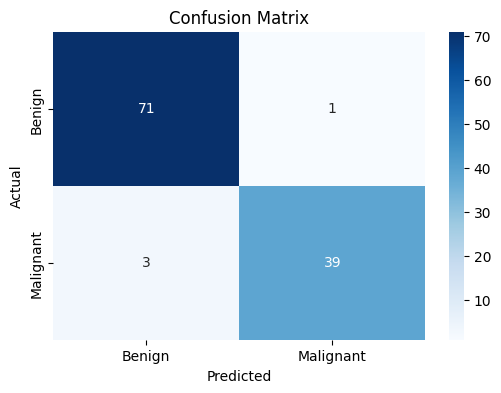

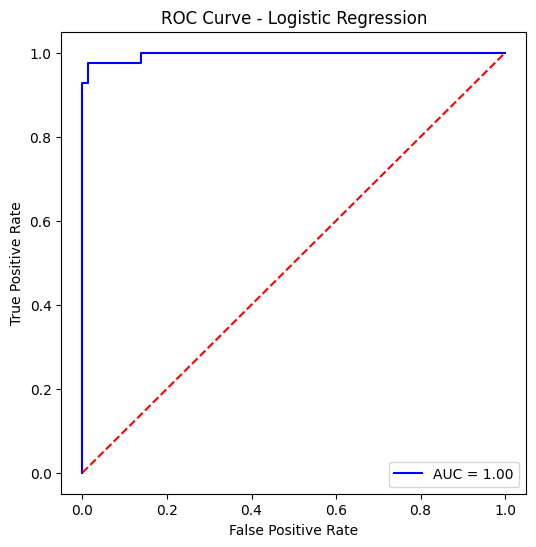


--- Real-Time Test ---
Prediction for first row in dataset: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [7]:
# Breast Cancer Classification with Real-Time Testing and Graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

# -------------------------------
# Step 1: Load and preprocess data
# -------------------------------
file_path = "data(1).csv"   # Change if needed
data = pd.read_csv(file_path)

# Drop useless columns
data = data.drop(["id", "Unnamed: 32"], axis=1)

# Encode target variable (M = 1, B = 0)
data["diagnosis"] = data["diagnosis"].map({"M": 1, "B": 0})

# Features and Target
X = data.drop("diagnosis", axis=1)
y = data["diagnosis"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -------------------------------
# Step 2: Train Logistic Regression Model
# -------------------------------
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# -------------------------------
# Step 3: Evaluation Metrics
# -------------------------------
print("Model Performance on Test Data:")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"Recall: {recall_score(y_test, y_pred)*100:.2f}%")
print(f"F1-Score: {f1_score(y_test, y_pred)*100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

# -------------------------------
# Step 4: Real-Time Prediction
# -------------------------------
def predict_real_time(input_features):
    """
    input_features: list of 30 feature values (float)
    returns: 'Malignant' or 'Benign'
    """
    input_array = np.array(input_features).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)[0]
    return "Malignant" if prediction == 1 else "Benign"

# -------------------------------
# Example Real-Time Test
# -------------------------------
print("\n--- Real-Time Test ---")
sample = X.iloc[0].values  # Example: first patient’s data
print("Prediction for first row in dataset:", predict_real_time(sample))
